In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Generate simulation data

In [2]:
def get_complete(n_cells, n_peaks, n_cluster, total_peaks, seed=1):
    np.random.seed(seed)
    sim = np.zeros((total_peaks, n_cells*n_cluster))
    labels = []
    for i in range(n_cluster):
        mask1 = np.random.rand(n_peaks, n_cells)
        sim[i*n_peaks:(i+1)*n_peaks, i*n_cells:(i+1)*n_cells] = 2
        sim[i*n_peaks:(i+1)*n_peaks, i*n_cells:(i+1)*n_cells][mask1 < 0.2] = 1
        labels.append(['cell'+str(i+1)]*n_cells)
    labels = np.concatenate(labels)
    return sim, labels

def add_noise(data, frac=0.1, seed=3):
    np.random.seed(seed)
    noise = np.random.rand(*data.shape)
    data[noise < frac] = 2
    data[noise < frac/5] = 1
    return data

def corruption(data, n_cells, n_peaks, n_cluster, frac=0.1, seed=2):
    np.random.seed(seed)
    for i in range(n_cluster):
        mask = np.random.rand(n_peaks, n_cells) < frac
        data[i*n_peaks:(i+1)*n_peaks, i*n_cells:(i+1)*n_cells][mask] = 0
    return data

In [3]:
path = 'simulate/data/'

In [4]:
# complete, labels = get_complete(100, 100, 3, 1000);print(complete.shape)

# pd.DataFrame(complete).to_csv(path+'complete.txt', sep='\t')
# pd.Series(labels).to_csv(path+'labels.txt', sep='\t', header=None)

In [5]:
# for frac in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#     corrupt_data = corruption(complete, 100, 100, 3, frac=frac)
#     corrupt_data = add_noise(corrupt_data, frac=0.1)
#     sns.heatmap(corrupt_data, cmap='Blues');plt.show()
#     pd.DataFrame(corrupt_data).to_csv(path+'corrupt_{}.txt'.format(frac), sep='\t')

## 2. Evaluation of different corruption fraction

In [4]:
outdir = 'simulate/output/'

In [5]:
from scipy.stats import pearsonr
def pairwise_pearson(A, B):
    corrs = []
    for i in range(A.shape[0]):
        corr = pearsonr(A.iloc[i], B.iloc[i])[0]
        corrs.append(corr)
    return corrs

def get_meta(data, n_cluster=3):
    meta = np.zeros((300, 300))
    for i in range(n_cluster):
        meta_ = data[:300, i*100:(i+1)*100].mean(1)
        meta[:, i*100:(i+1)*100] = np.tile(meta_, [100, 1]).T
    return meta

In [6]:
num = 300 # specific_peak_num

In [7]:
from scale.plot import plot_heatmap, plot_embedding

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Fig S14a Reference

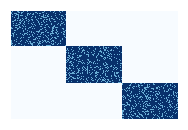

In [8]:
# ref = pd.DataFrame(complete)
ref = pd.read_csv(path+'complete.txt', sep='\t', index_col=0)
plt.figure(figsize=(3, 2))
g = sns.heatmap(ref[:num], cmap='Blues', xticklabels='', yticklabels='', vmax=2, cbar=False);plt.show()

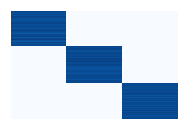

In [9]:
meta = get_meta(ref.values)
plt.figure(figsize=(3,2))
sns.heatmap(meta, cmap='Blues', xticklabels='', yticklabels='', vmax=2, cbar=False);plt.show()
meta = pd.DataFrame(meta)

## Fig S14b

====== 0.1 ======
Corrupted


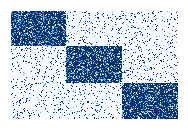

scImpute


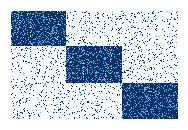

SAVER


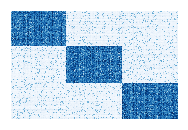

MAGIC


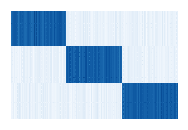

scVI


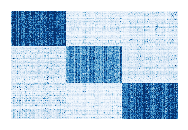

SCALE


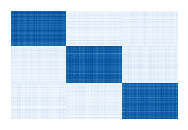

====== 0.2 ======
Corrupted


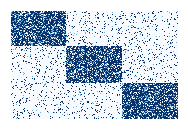

scImpute


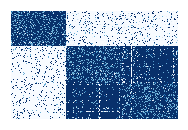

SAVER


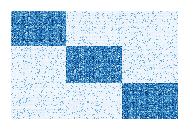

MAGIC


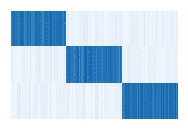

scVI


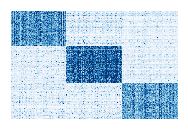

SCALE


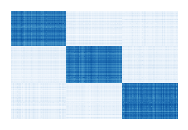

====== 0.3 ======
Corrupted


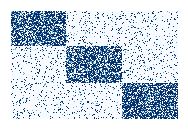

scImpute


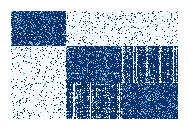

SAVER


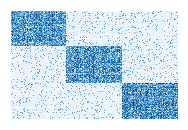

MAGIC


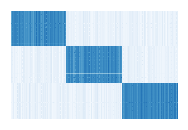

scVI


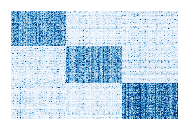

SCALE


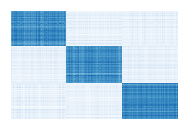

====== 0.4 ======
Corrupted


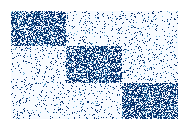

scImpute


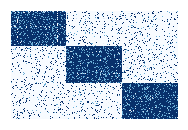

SAVER


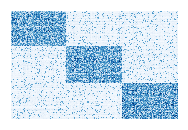

MAGIC


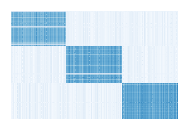

scVI


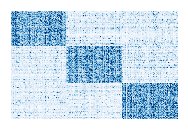

SCALE


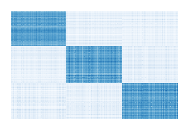

====== 0.5 ======
Corrupted


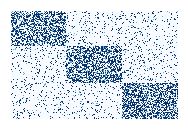

scImpute


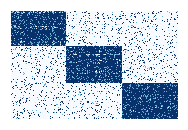

SAVER


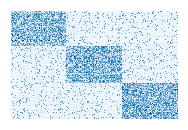

MAGIC


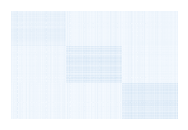

scVI


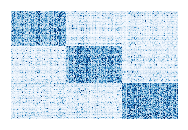

SCALE


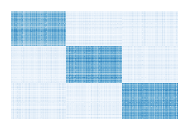

====== 0.6 ======
Corrupted


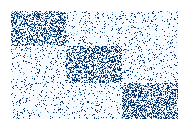

scImpute


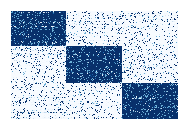

SAVER


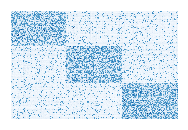

MAGIC


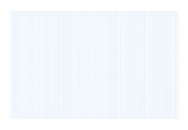

scVI


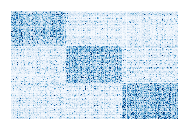

SCALE


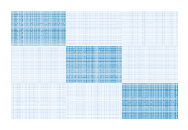

====== 0.7 ======
Corrupted


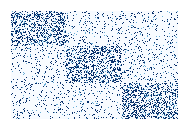

scImpute


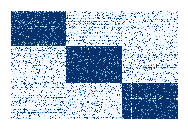

SAVER


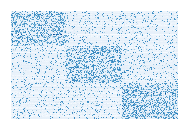

MAGIC


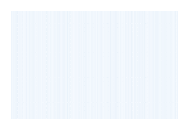

scVI


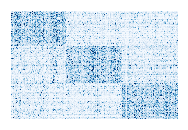

SCALE


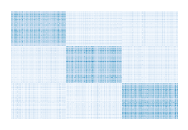

====== 0.8 ======
Corrupted


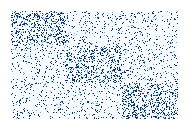

scImpute


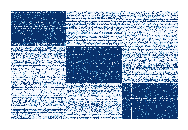

SAVER


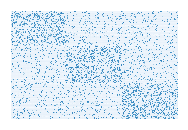

MAGIC


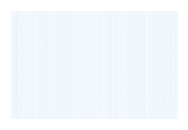

scVI


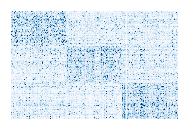

SCALE


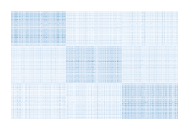

In [10]:
# for frac in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
peak_corr = []
cell_corr = []
peak_frac = []
peak_method = []
cell_frac = []
cell_method = []
methods = ['Corrupted', 'scImpute', 'SAVER', 'MAGIC', 'scVI', 'SCALE']
# for frac in [0.2, 0.4, 0.6, 0.8]:
for frac in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    print('======', frac, '======')
    filenames = ['corrupt_{}.txt'.format(frac), 'scImpute/scimpute_count.txt', 'SAVER_imputed.txt',
                 'Magic_imputed.txt', 'scVI_imputed.txt', 'imputed_data.txt']
    count_list = []
    for filename, method in zip(filenames, methods):
        if filename == 'corrupt_{}.txt'.format(frac):
            data = pd.read_csv(path+filename, sep='\t', index_col=0)
        elif filename == 'scImpute/scimpute_count.txt':
            data = pd.read_csv(outdir+'corrupt_{}/'.format(frac)+filename, sep=' ', index_col=0)
        else:
            data = pd.read_csv(outdir+'corrupt_{}/'.format(frac)+filename, sep='\t', index_col=0)
            
        # plot heatmap
        print(method)
        plt.figure(figsize=(3, 2))
        g = sns.heatmap(data[:num], cmap='Blues', xticklabels='', yticklabels='', vmax=2, cbar=False);plt.show()

        peak_corr.append(pairwise_pearson(ref[:num], data[:num]))
#         peak_corr.append(pairwise_pearson(meta[:num], data[:num]))
        peak_method.append([method]*num)
        peak_frac.append([frac]*num)
        
        cell_corr.append(pairwise_pearson(ref[:num].T, data[:num].T))
#         cell_corr.append(pairwise_pearson(meta[:num].T, data[:num].T))
        cell_method.append([method]*ref.shape[1])
        cell_frac.append([frac]*ref.shape[1])
        
        
        
peak_corr = pd.Series(np.concatenate(peak_corr, axis=0))
peak_method = pd.Series(np.concatenate(peak_method, axis=0))
peak_frac = pd.Series(np.concatenate(peak_frac, axis=0))

cell_corr = pd.Series(np.concatenate(cell_corr, axis=0))
cell_method = pd.Series(np.concatenate(cell_method, axis=0))
cell_frac = pd.Series(np.concatenate(cell_frac, axis=0))

peak_concat = pd.concat([peak_corr, peak_method, peak_frac],  axis=1)
peak_concat.columns = ['correlation with reference', 'method', 'corruption fraction']

cell_concat = pd.concat([cell_corr, cell_method, cell_frac], axis=1)
cell_concat.columns = ['correlation with reference', 'method', 'corruption fraction']

In [11]:
peak_concat.to_csv('simulate/simulate_peak_correlation.txt', sep='\t')
cell_concat.to_csv('simulate/simulate_cell_correlation.txt', sep='\t')

## Fig S14c

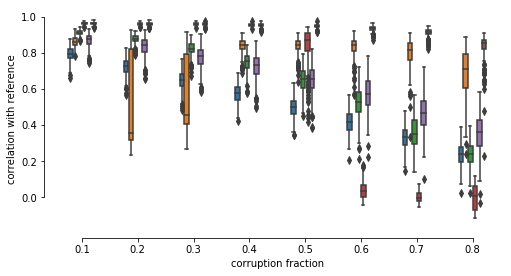

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x='corruption fraction', y='correlation with reference', hue='method', width=0.5, data=peak_concat)
sns.despine(offset=10, trim=True)
plt.legend().set_visible(False)
# plt.legend(loc='lower left', bbox_to_anchor=(0.2,0.))
# plt.title('Peak')
# plt.ylim(-0.2)

plt.show()

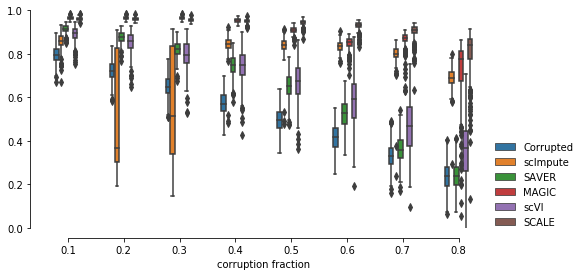

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='corruption fraction', y='correlation with reference', hue='method', width=0.5, data=cell_concat)
plt.ylim(-0, 1)
sns.despine(offset=10, trim=True)
plt.legend().set_visible(False)
plt.ylabel('')
# plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0))
plt.legend(loc='center left', bbox_to_anchor=(1,0.2), frameon=False)
# plt.title('Cell')
plt.show()